# Analysis Task

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.

        Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

        Which state has the maximum complaints
        Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

The analysis results to be provided with insights wherever applicable.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Import data into Python environment


In [2]:
data = pd.read_csv(r"C:\Users\Lovely Rajput\Desktop\Data Science with Python\Projects\1568699544_comcast_telecom_complaints_data\Comcast_telecom_complaints_data.csv")
data

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


#### Provide the trend chart for the number of complaints at monthly and daily granularity levels

In [3]:
data['Month'] = data['Date'].str[3:5]
data['Month'] = data['Month'].astype('int32')
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5


In [4]:
data["date_index"] = data["Date_month_year"] + " " + data["Time"]

In [5]:
data["date_index"] = pd.to_datetime(data["date_index"])
data["Date_month_year"] = pd.to_datetime(data["Date_month_year"])

In [6]:
data.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
Month                                   int32
date_index                     datetime64[ns]
dtype: object

In [7]:
data = data.set_index(data["date_index"])
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,date_index
date_index,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,2015-04-22 15:53:50
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,2015-08-04 10:22:56
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,2015-04-18 09:55:47
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,2015-07-05 11:59:35
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,2015-05-26 13:25:26


In [8]:
## Provide the trend chart for the number of complaints at daily granularity levels
daily_complaints = data["Date_month_year"].value_counts().to_frame().head()
daily_complaints


,Date_month_year
2015-06-24,218
2015-06-23,190
2015-06-25,98
2015-06-26,55
2015-06-30,53


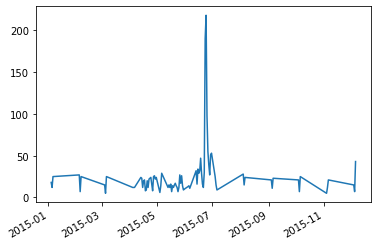

In [9]:
data["Date_month_year"].value_counts().plot();

In [10]:
## Provide the trend chart for the number of complaints at monthly granularity levels
# monthly_complaints = data.groupby('Month').size().to_frame()
# monthly_complaints
monthly_complaints1 = data.groupby(pd.Grouper(freq="M")).size().to_frame()
monthly_complaints1

,0
date_index,
2015-01-31,55
2015-02-28,59
2015-03-31,45
2015-04-30,375
2015-05-31,317
2015-06-30,1046
2015-07-31,49
2015-08-31,67
2015-09-30,55


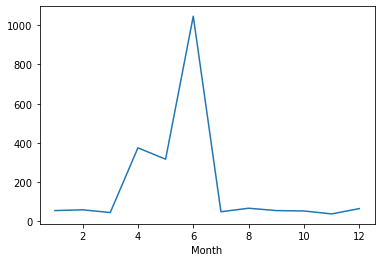

In [13]:
data.groupby('Month').size().plot();

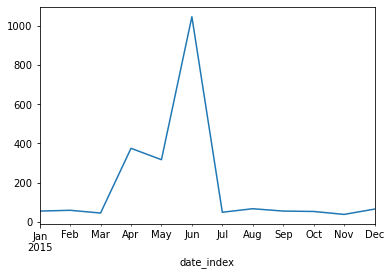

In [11]:
data.groupby(pd.Grouper(freq="M")).size().plot();

#### Provide a table with the frequency of complaint types
    Which complaint types are maximum i.e., around internet, network issues, or across any other domains.


In [16]:
frequency_of_complaint_types = data['Customer Complaint'].value_counts().to_frame()
frequency_of_complaint_types.head(10)

# frequency_of_complaint_types = data.groupby('Customer Complaint').size().sort_values(ascending=False).to_frame()
# frequency_of_complaint_types
#Comcast complaint types are maximum

,Customer Complaint
Comcast,83
Comcast Internet,18
Comcast Data Cap,17
comcast,13
Data Caps,11
Comcast Billing,11
Comcast Data Caps,11
Unfair Billing Practices,9
Comcast data cap,8
Comcast internet,8


#### Create a new categorical variable with value as Open and Closed
    Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.


In [17]:
data.Status.unique()

data["NewStatus"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in data["Status"]]


In [26]:
data.head(5)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,date_index,NewStatus
date_index,,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,2015-04-22 15:53:50,Closed
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,2015-08-04 10:22:56,Closed
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,2015-04-18 09:55:47,Closed
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,2015-07-05 11:59:35,Open
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,2015-05-26 13:25:26,Closed


#### Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

    Which state has the maximum complaints
    Which state has the highest percentage of unresolved complaints

In [34]:
#Which state has the maximum complaints

StateWise_complaints = data.groupby('State').size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1)
StateWise_complaints.head()


# Georgia has maximum complaints

,State,Count
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143


In [21]:
Status_complaints = data.groupby(["State","NewStatus"]).size().unstack().fillna(0)
Status_complaints.head()

NewStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0


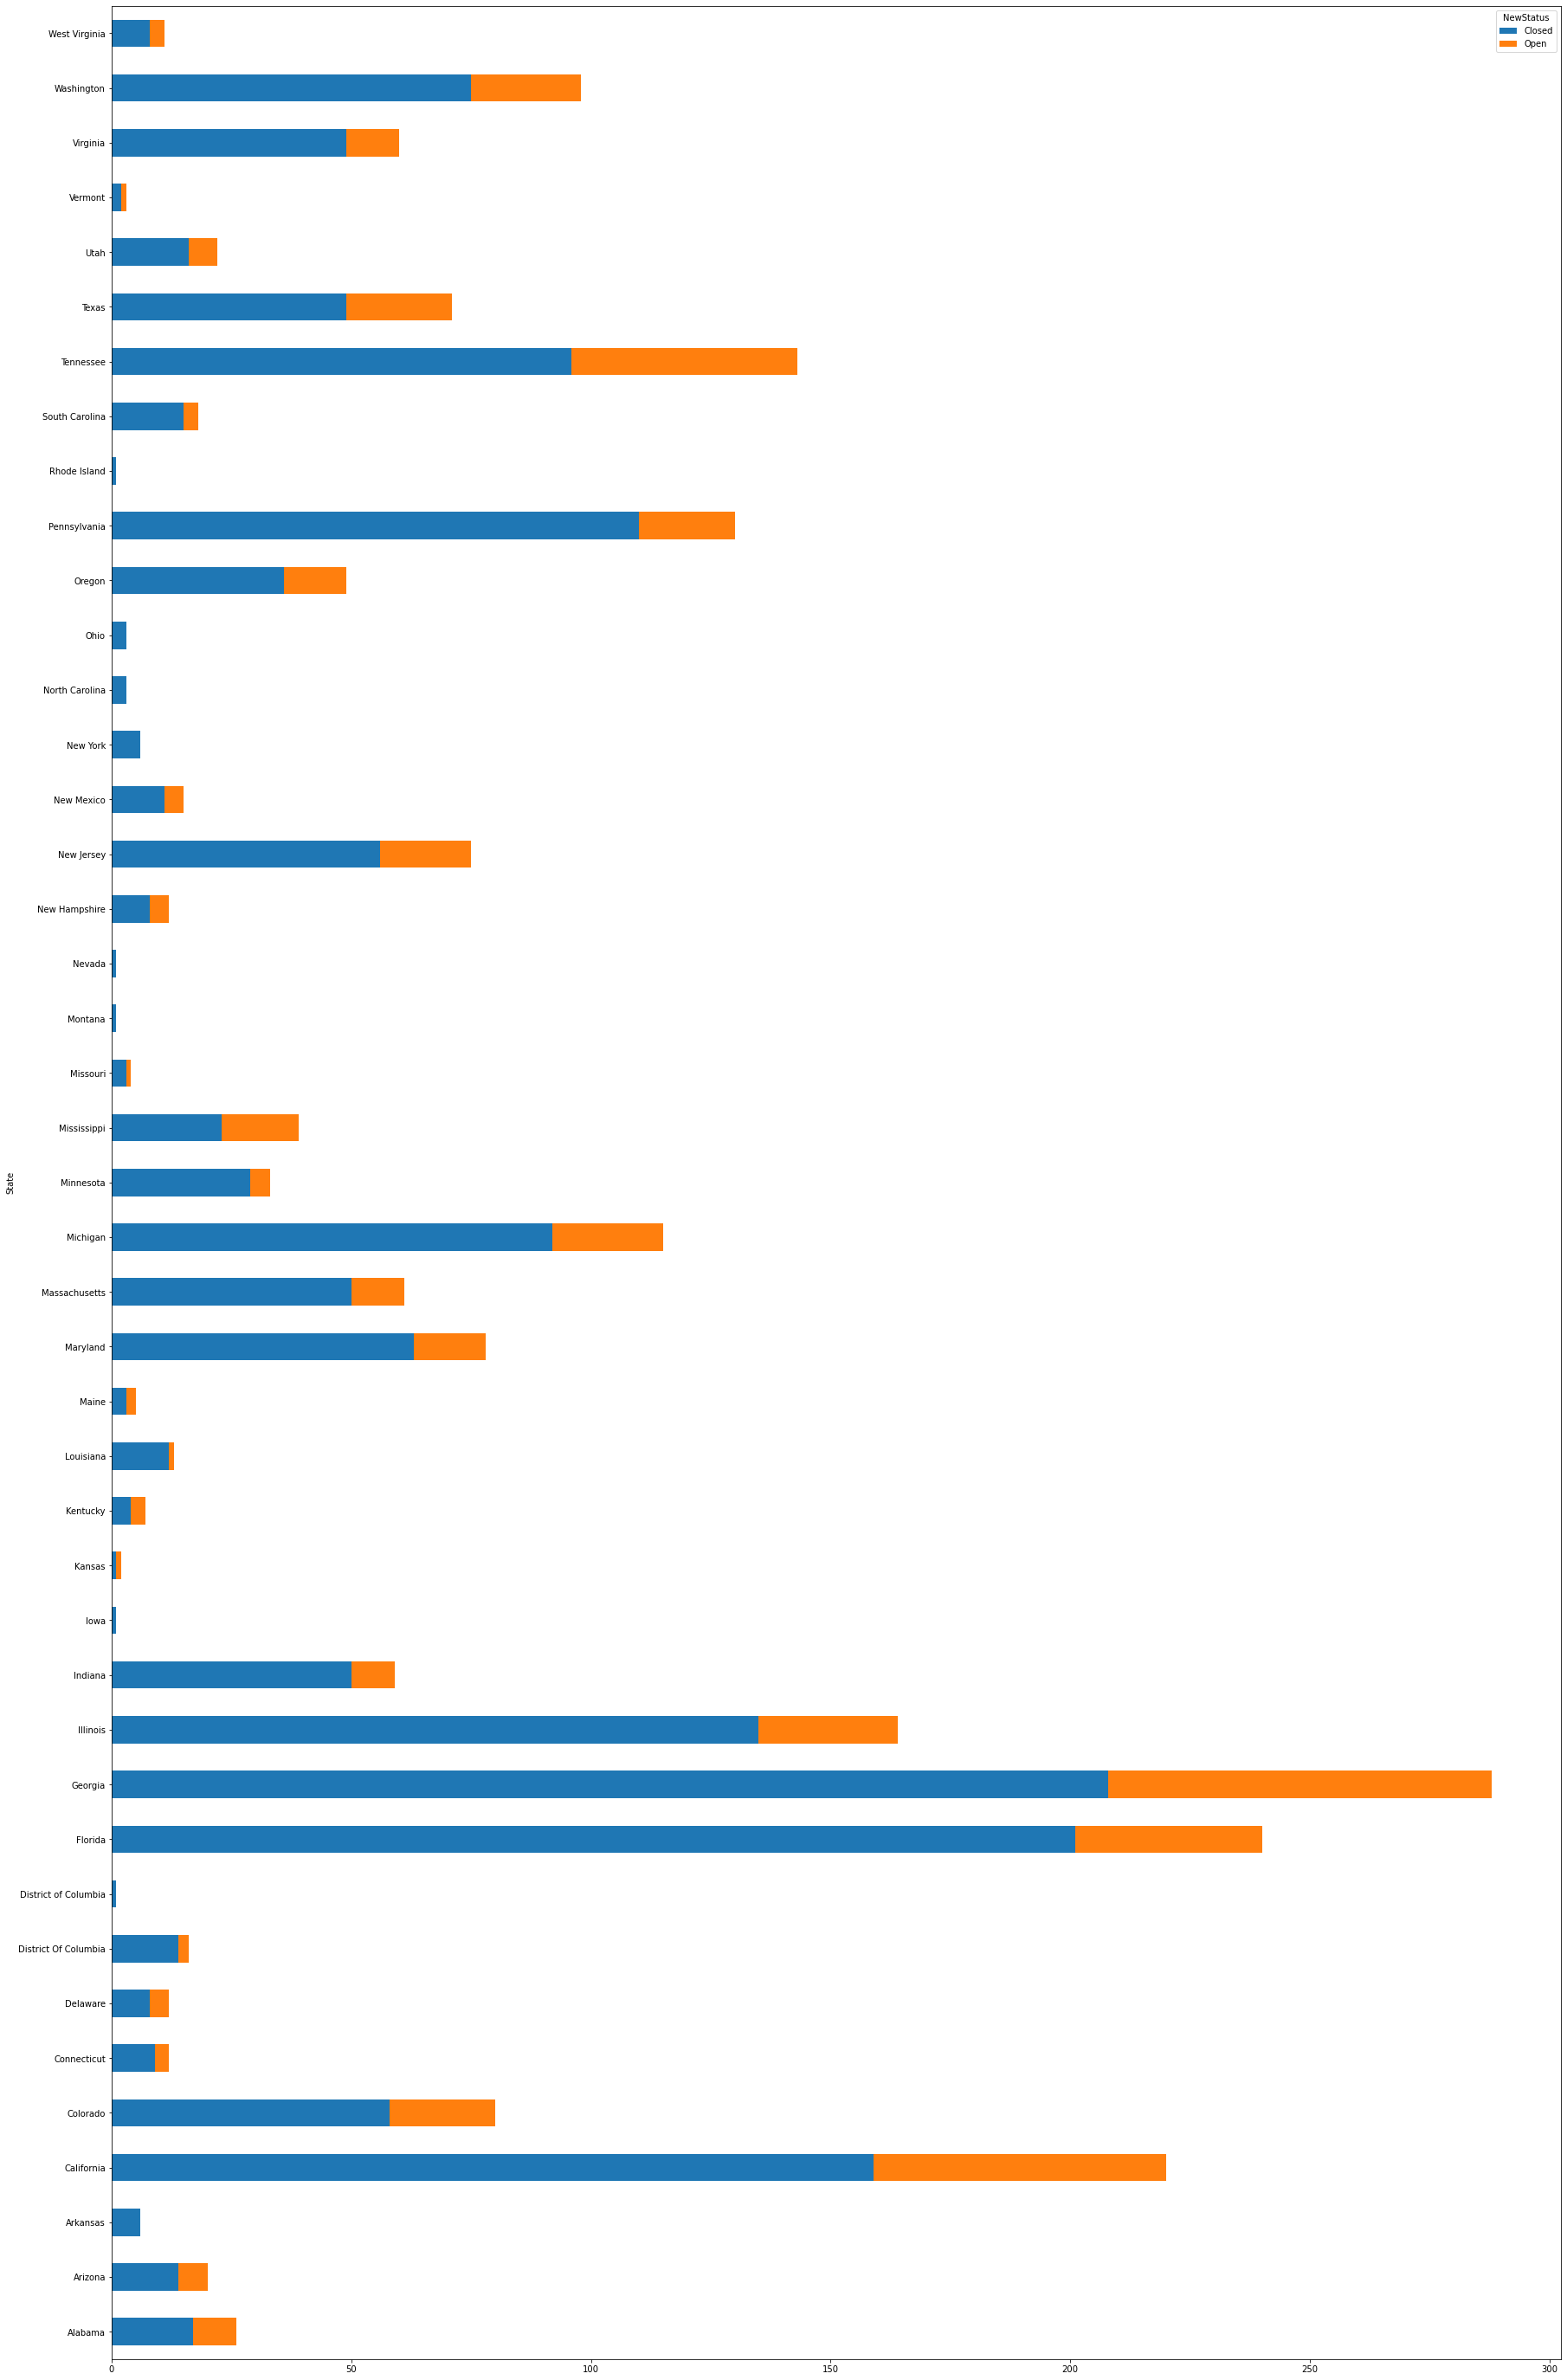

In [22]:
Status_complaints.plot(kind="barh", figsize=(30,50), stacked=True);

### Which state has the highest percentage of unresolved complaints

In [36]:
Status_complaints['Total'] = Status_complaints['Open'] + Status_complaints['Closed']
Status_complaints['Pending_Percent'] = Status_complaints['Open'] / Status_complaints['Total'] * 100
Status_complaints.max()

# Georgia has highest percentage of unresolved complaints

# Max_complaints = data.groupby('State').size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1).max()
# Max_complaints

StateWise_complaints.groupby(StateWise_complaints['State'])['Count'].value_counts(normalize=True)

State                 Count
Alabama               26       1.0
Arizona               20       1.0
Arkansas              6        1.0
California            220      1.0
Colorado              80       1.0
Connecticut           12       1.0
Delaware              12       1.0
District Of Columbia  16       1.0
District of Columbia  1        1.0
Florida               240      1.0
Georgia               288      1.0
Illinois              164      1.0
Indiana               59       1.0
Iowa                  1        1.0
Kansas                2        1.0
Kentucky              7        1.0
Louisiana             13       1.0
Maine                 5        1.0
Maryland              78       1.0
Massachusetts         61       1.0
Michigan              115      1.0
Minnesota             33       1.0
Mississippi           39       1.0
Missouri              4        1.0
Montana               1        1.0
Nevada                1        1.0
New Hampshire         12       1.0
New Jersey            75   

#### Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [29]:
Status_complaints['Total'] = Status_complaints['Open'] + Status_complaints['Closed']
Status_complaints['Resolved_Percent'] = Status_complaints['Closed'] / Status_complaints['Total'] * 100
Status_complaints.head(10)

NewStatus,Closed,Open,Total,Pending_Percent,Resolved_Percent
State,,,,,
Alabama,17.0,9.0,26.0,34.615385,65.384615
Arizona,14.0,6.0,20.0,30.000000,70.000000
Arkansas,6.0,0.0,6.0,0.000000,100.000000
California,159.0,61.0,220.0,27.727273,72.272727
Colorado,58.0,22.0,80.0,27.500000,72.500000
Connecticut,9.0,3.0,12.0,25.000000,75.000000
Delaware,8.0,4.0,12.0,33.333333,66.666667
District Of Columbia,14.0,2.0,16.0,12.500000,87.500000
District of Columbia,1.0,0.0,1.0,0.000000,100.000000
